<h1 align="center"><strong>Analyzing the Skincare Industry: A Data-Driven Approach</strong></h1>




### **Unveiling the Secrets of Skincare: A Data-Driven Exploration**

In the world of beauty and skincare, every product tells a story—of promises made to consumers, expectations set by brands, and the invisible thread that connects the two: data. As the industry flourishes with new innovations and trends, it becomes essential to look beyond the packaging and delve into the numbers that shape consumer preferences and market dynamics.

This project embarks on a journey to decode the skincare industry using data from 8,494 products. From cult-favorite serums to budget-friendly moisturizers, every row in the dataset represents a piece of a larger puzzle. By combining the power of exploratory analysis and predictive modeling, we uncover the forces driving success in this vibrant market.

---

#### **The Mission**
Imagine being able to predict the next best-selling product or identify the perfect price point for maximum consumer love. This project aims to turn that vision into reality. Through data analysis and machine learning, we’re uncovering the “why” behind consumer choices and the “how” for brands to thrive.

---

#### **Objectives**
1. **Data Cleaning and Preparation**:
   - Address missing values and standardize data for consistency and accuracy.
   - Engineer new features to enrich the dataset and enhance analytical capabilities.

2. **Exploratory Data Analysis (EDA)**:
   - Examine trends in pricing, ratings, consumer feedback, and brand performance.
   - Visualize relationships between key product attributes and their impact on success.

3. **Predictive Modeling**:
   - Develop machine learning models to predict:
     - **Product Ratings**: Identify factors that drive high ratings.
     - **Consumer Popularity**: Forecast metrics such as "love counts."
   - Evaluate model performance using metrics like RMSE, R², accuracy, and F1-score.
   - Perform feature importance analysis to highlight critical drivers of success.

4. **Insights and Recommendations**:
   - Provide actionable insights to help brands optimize pricing, product development, and marketing strategies.

---

#### **Scope of Work**
1. **Data Cleaning**:
   - Standardized features like `price_usd`, `categories`, and `ingredients`.
   - Addressed missing values and created derived features such as `discount_percentage`.

2. **Exploratory Analysis**:
   - Identified key trends and patterns in pricing, ratings, and brand performance.
   - Highlighted relationships between consumer preferences and product attributes.

3. **Model Development**:
   - Implemented machine learning models, including Random Forest Regressors and Gradient Boosting Classifiers.
   - Conducted hyperparameter tuning to optimize model performance.
   - Analyzed feature importance to uncover the most influential factors.

4. **Actionable Insights**:
   - Highlighted optimal price ranges, high-performing categories, and brand-specific trends.
   - Provided strategic recommendations for aligning with consumer demands and market trends.


#### **Significance**
This analysis combines exploratory and predictive techniques to offer a comprehensive understanding of the skincare product market. The results provide valuable insights for businesses aiming to enhance their market presence, researchers seeking to understand consumer behavior, and consumers making informed purchasing decisions.

This study underscores the importance of leveraging data analytics in the evolving skincare industry, presenting a roadmap for innovation and success.

---


# Cleaning Process

### 1. Loading the Dataset
The raw dataset (`product_info.csv`) was loaded from the following location:

```plaintext
C:\Users\silin\Downloads\Skin care products analysis\Skincare-Analysis-1
```

### 2. Handling Missing Values
- **Essential Columns**: Rows missing critical fields (`product_id`, `product_name`) were dropped.
- **Numeric Columns**: Missing values in numeric columns were replaced with `0`. These columns include:
  - `loves_count`
  - `rating`
  - `reviews`
  - `price_usd`
  - `value_price_usd`
  - `sale_price_usd`
- **Categorical Columns**: Missing values in categorical columns were replaced with `"Unknown"`. These columns include:
  - `brand_name`
  - `size`
  - `variation_type`
  - `variation_value`
  - `primary_category`
  - `secondary_category`
  - `tertiary_category`

### 3. Parsing and Cleaning Text Columns
- **Ingredients**: Parsed list-like strings in the `ingredients` column into Python lists.
- **Highlights**: Processed the `highlights` column similarly to ensure data consistency.

### 4. Standardizing the `size` Column
The `size` column was standardized to ensure uniformity:
- Examples:
  - `"10ml"` → `"10 mL"`
  - `"5oz"` → `"5 oz"`
  - `"100g"` → `"100 g"`

### 5. Creating New Features
A new feature, `discount_percentage`, was calculated as:

```python
discount_percentage = ((price_usd - sale_price_usd) / price_usd) * 100
```

This represents the percentage discount offered on each product.

### 6. Removing Duplicates
Duplicate rows were removed to ensure the uniqueness of records.

### 7. Converting Boolean Columns
The following boolean-like columns were converted to integers (1 for `True`, 0 for `False`):
- `limited_edition`
- `new`
- `online_only`
- `out_of_stock`
- `sephora_exclusive`

### 8. Handling Outliers
- **Price (`price_usd`)**: Limited to values between 0 and $1000.
- **Rating (`rating`)**: Limited to values between 0 and 5.

### 9. Saving the Cleaned Dataset
The cleaned dataset was saved to the following location:

```plaintext
C:\Users\silin\Downloads\Skin care products analysis\Skincare-Analysis-1\cleaned_product_info.csv
```



In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'product_info.csv'  # Ensure this file is in the repository
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise Exception(f"Error: {file_path} not found. Ensure the file is in the same directory as this notebook.")

# Display basic information about the dataset
print(data.head())
print(data.info())

# Cleaning Pipeline
# 1. Handle Missing Values
data = data.dropna(subset=['product_id', 'product_name'])

numeric_columns = ['loves_count', 'rating', 'reviews', 'price_usd', 'value_price_usd', 'sale_price_usd']
data[numeric_columns] = data[numeric_columns].fillna(0)

categorical_columns = ['brand_name', 'size', 'variation_type', 'variation_value', 
                       'primary_category', 'secondary_category', 'tertiary_category']
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# 2. Parse List-Like Columns
def clean_list_column(column):
    return column.apply(lambda x: eval(x) if isinstance(x, str) else [])

data['ingredients'] = clean_list_column(data['ingredients'])
data['highlights'] = clean_list_column(data['highlights'])

# Convert list-like columns to strings for deduplication
data['ingredients'] = data['ingredients'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')
data['highlights'] = data['highlights'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# 3. Standardize Size Column
def standardize_size(size):
    if pd.isna(size):
        return 'Unknown'
    size = str(size).lower()
    if 'ml' in size:
        return size.replace('ml', '').strip() + ' mL'
    if 'oz' in size:
        return size.replace('oz', '').strip() + ' oz'
    if 'g' in size:
        return size.replace('g', '').strip() + ' g'
    return size

data['size'] = data['size'].apply(standardize_size)

# 4. Create New Features
data['discount_percentage'] = np.where(data['price_usd'] > 0, 
                                        (data['price_usd'] - data['sale_price_usd']) / data['price_usd'] * 100, 
                                        0)

# 5. Remove Duplicates
data = data.drop_duplicates()

# 6. Convert Boolean-Like Columns
boolean_columns = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']
data[boolean_columns] = data[boolean_columns].fillna(0).astype(int)

# 7. Handle Outliers
data = data[(data['price_usd'] >= 0) & (data['price_usd'] <= 1000)]
data = data[(data['rating'] >= 0) & (data['rating'] <= 5)]

# 8. Save Cleaned Dataset
output_file_path = 'cleaned_product_info.csv'
data.to_csv(output_file_path, index=False)

print("Cleaning complete. Cleaned dataset saved to:", output_file_path)


Dataset loaded successfully.
  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclus

<string>:1: SyntaxWarning: invalid escape sequence '\A'
<string>:1: SyntaxWarning: invalid escape sequence '\A'
<string>:1: SyntaxWarning: invalid escape sequence '\A'


Cleaning complete. Cleaned dataset saved to: cleaned_product_info.csv


In [3]:
import pandas as pd

# Define the path to the cleaned dataset
cleaned_data_path = r"C:\Users\silin\Downloads\Skin care products analysis\Skincare-Analysis-1\cleaned_product_info.csv"

# Load the cleaned dataset
cleaned_data = pd.read_csv(cleaned_data_path)

# Display the first few rows of the cleaned dataset
print(cleaned_data.head())


  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0         unknown                             Unknown   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... out_of_stock sephora_exclusive  \
0         Unknown  ...            0

# EDA

Here are the **20 best EDA analyses**, chosen for their effectiveness in uncovering key insights about the dataset:

---

### 1. **Data Overview**
**Objective**: Understand the structure, data types, and missing values.
- Summary of dataset information and missing value visualization.

---

### 2. **Price Distribution**
**Objective**: Visualize the spread and concentration of product prices.
- Histogram and boxplot of `price_usd`.

---

### 3. **Rating Distribution**
**Objective**: Investigate how ratings are distributed across products.
- Density plot of `rating`.

---

### 4. **Top Brands by Reviews**
**Objective**: Identify the brands with the most reviews.
- Bar chart showing total reviews for top brands.

---

### 5. **Brand Price Range**
**Objective**: Analyze price variation across different brands.
- Boxplot of `price_usd` grouped by `brand_name`.

---

### 6. **Rating vs. Price**
**Objective**: Investigate if higher-priced products receive better ratings.
- Scatterplot with trend line for `price_usd` vs. `rating`.

---

### 7. **Missing Data Patterns**
**Objective**: Identify patterns in missing data.
- Heatmap of missing values.

---

### 8. **Top Categories by Rating**
**Objective**: Find categories with the highest average ratings.
- Bar chart of average `rating` grouped by `primary_category`.

---

### 9. **Correlation Matrix**
**Objective**: Determine relationships between numerical variables.
- Heatmap of correlations.

---

### 10. **Review Count Distribution**
**Objective**: Analyze the spread of reviews across products.
- Histogram of `reviews`.

---

### 11. **Value vs. Sale Price**
**Objective**: Compare value and sale prices to analyze discounts.
- Scatterplot of `value_price_usd` vs. `sale_price_usd`.

---

### 12. **Discounted Products Analysis**
**Objective**: Examine the extent of product discounts.
- Histogram of discount percentages.

---

### 13. **High-Rating Low-Price Products**
**Objective**: Highlight affordable products with excellent ratings.
- Scatterplot with filters for low price and high ratings.

---

### 14. **Average Rating by Brand**
**Objective**: Rank brands based on average ratings.
- Bar chart of average ratings for top brands.

---

### 15. **Outliers in Price**
**Objective**: Identify products with unusually high or low prices.
- Boxplot highlighting outliers in `price_usd`.

---

### 16. **Top Products by Love Counts**
**Objective**: Highlight the most loved products.
- Bar chart for top products based on `loves_count`.

---

### 17. **Rating by Category**
**Objective**: Examine how ratings differ across categories.
- Boxplot of `rating` grouped by `primary_category`.

---

### 18. **Sale Price Effectiveness**
**Objective**: Determine if discounted products have better ratings.
- Scatterplot of `sale_price_usd` vs. `rating`.

---

### 19. **Top Variations by Popularity**
**Objective**: Identify the most popular variation types.
- Bar chart for top variations by frequency.

---

### 20. **Products with Maximum Reviews**
**Objective**: Showcase the most reviewed products.
- Table or horizontal bar chart for products with review counts above a threshold.

---

Would you like the Python code for implementing these 20 EDA analyses? If so, I can format it along with the markdown descriptions for each!

<class 'pandas.core.frame.DataFrame'>
Index: 8493 entries, 0 to 8493
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           8493 non-null   object 
 1   product_name         8493 non-null   object 
 2   brand_id             8493 non-null   int64  
 3   brand_name           8493 non-null   object 
 4   loves_count          8493 non-null   int64  
 5   rating               8493 non-null   float64
 6   reviews              8493 non-null   float64
 7   size                 8493 non-null   object 
 8   variation_type       8493 non-null   object 
 9   variation_value      8493 non-null   object 
 10  variation_desc       1250 non-null   object 
 11  ingredients          8493 non-null   object 
 12  price_usd            8493 non-null   float64
 13  value_price_usd      8493 non-null   float64
 14  sale_price_usd       8493 non-null   float64
 15  limited_edition      8493 non-null   int32 

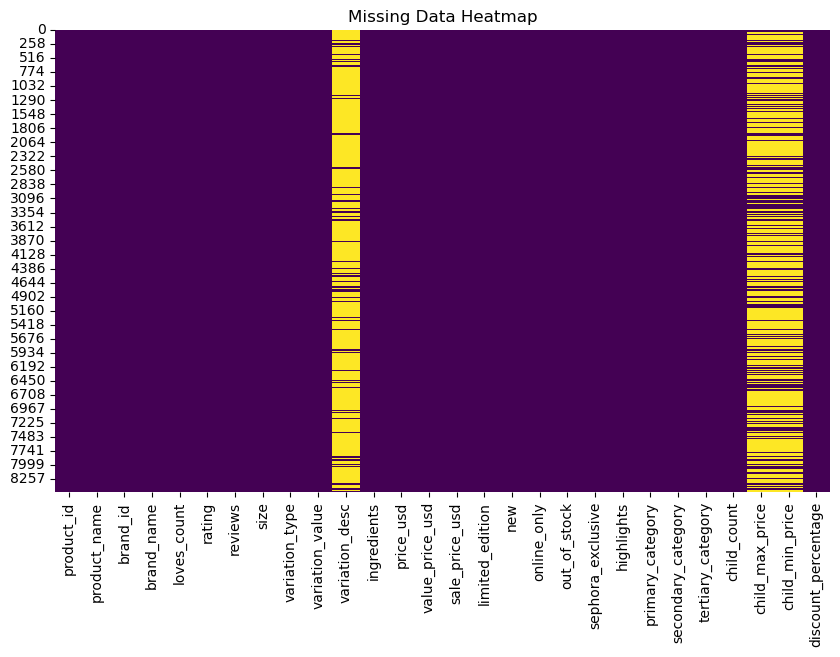

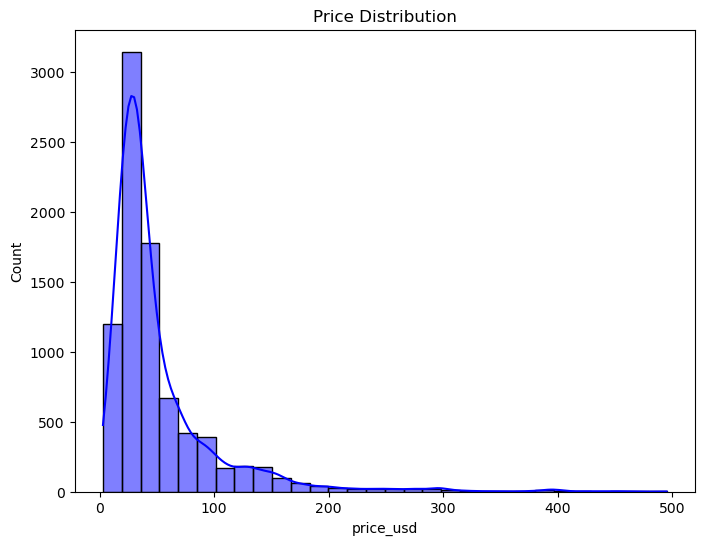

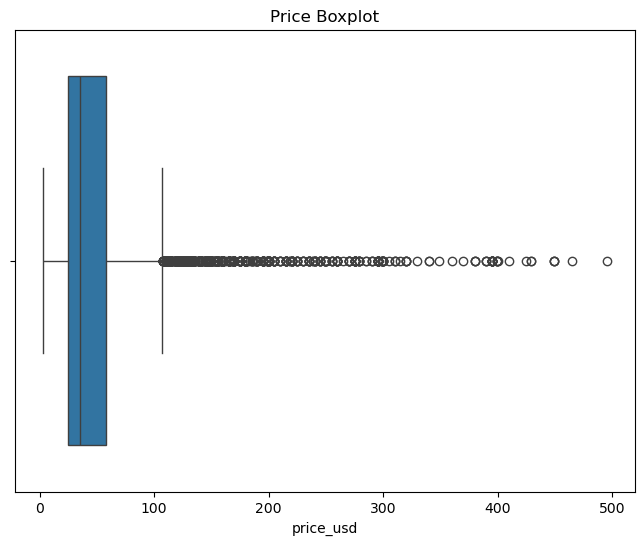

C:\Users\silin\AppData\Local\Temp\ipykernel_3976\4061204589.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['rating'], shade=True, color='green')


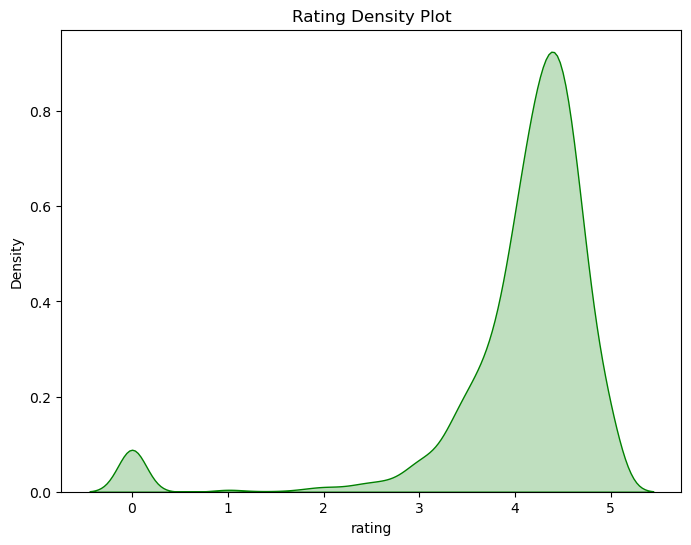

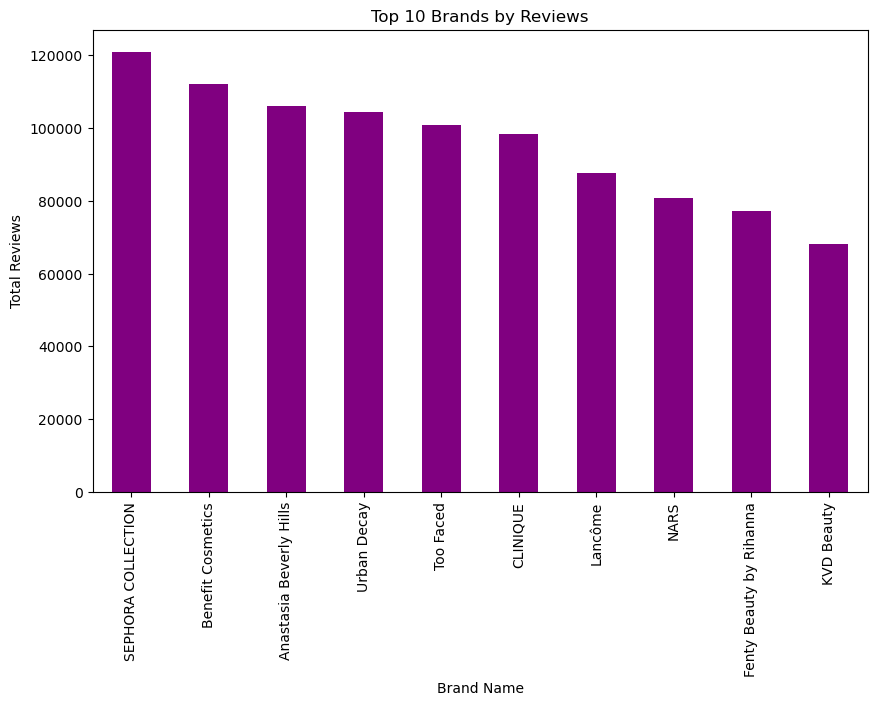

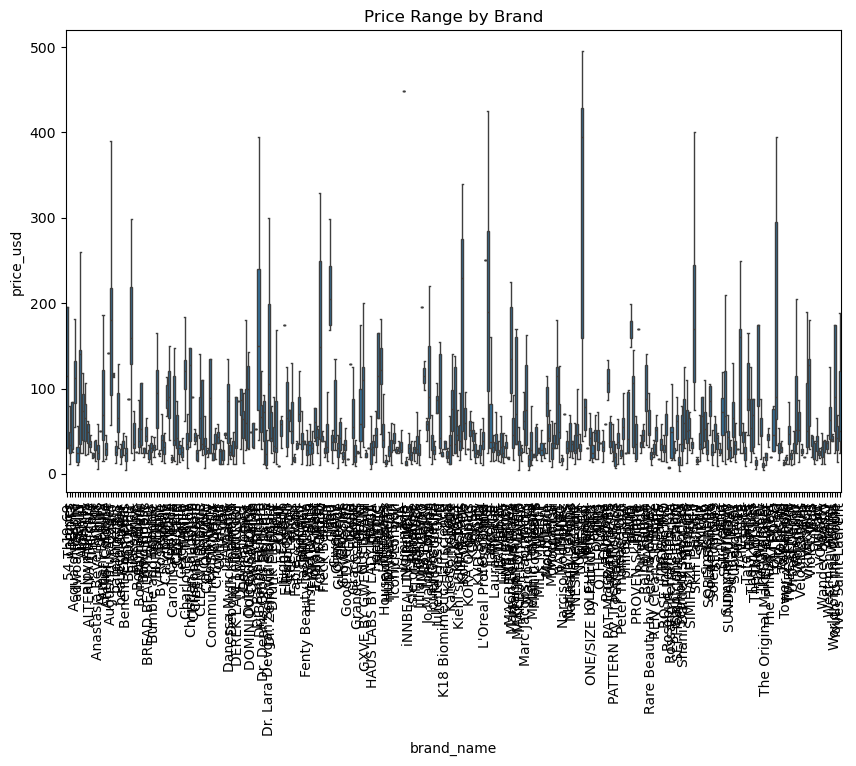

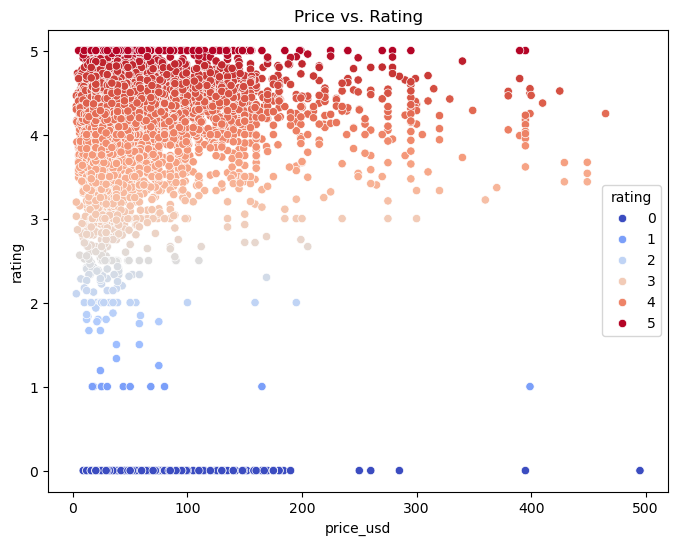

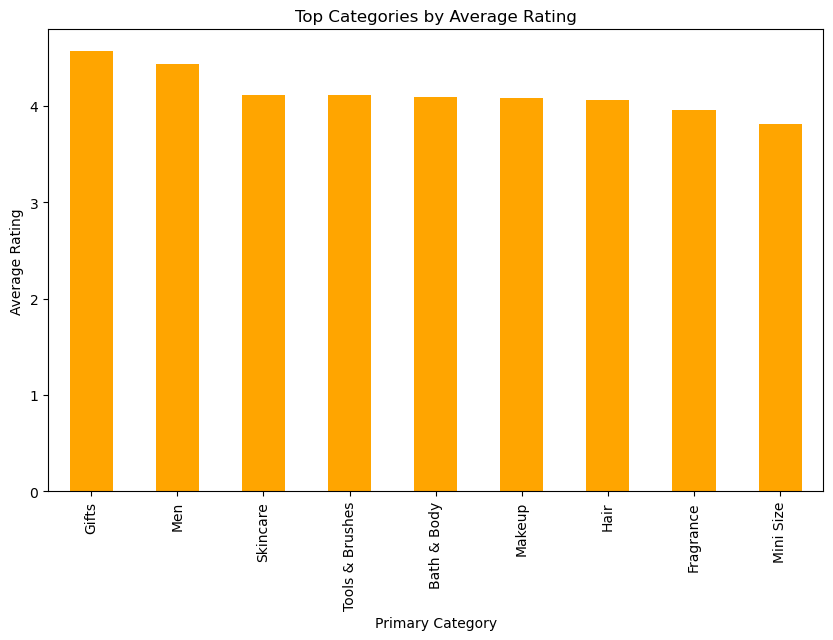

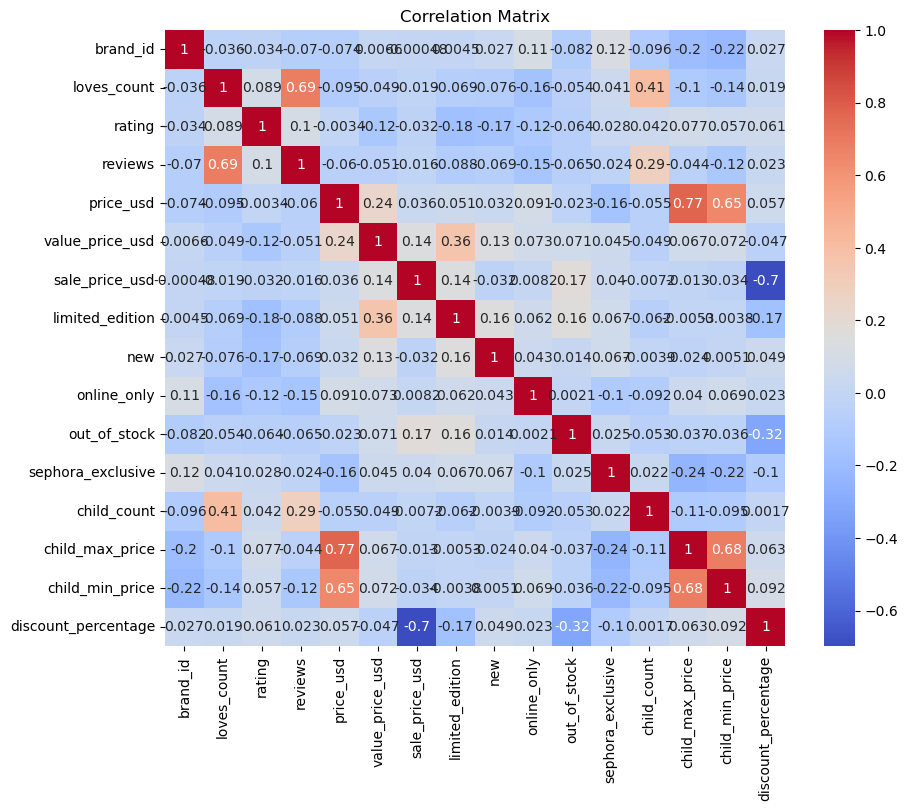

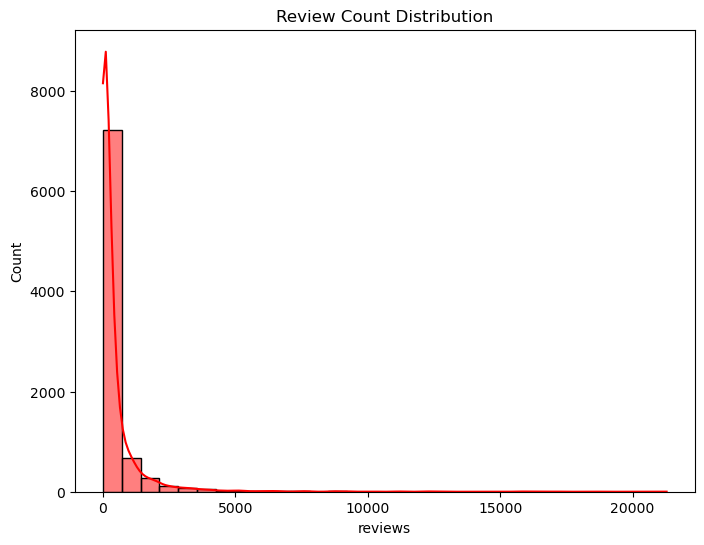

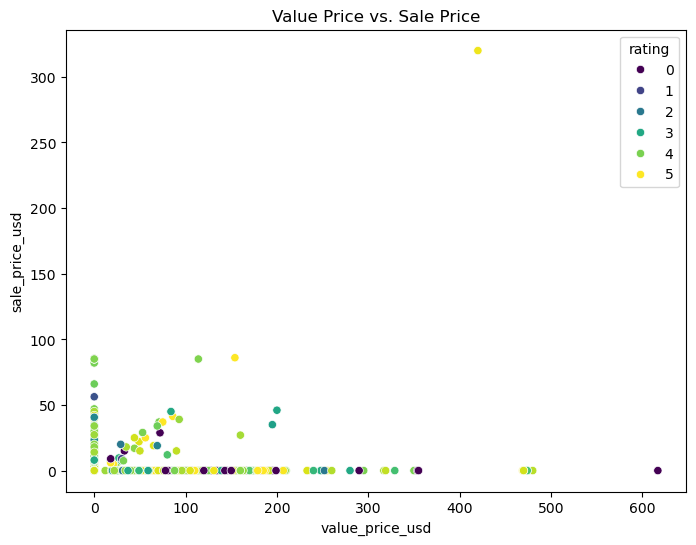

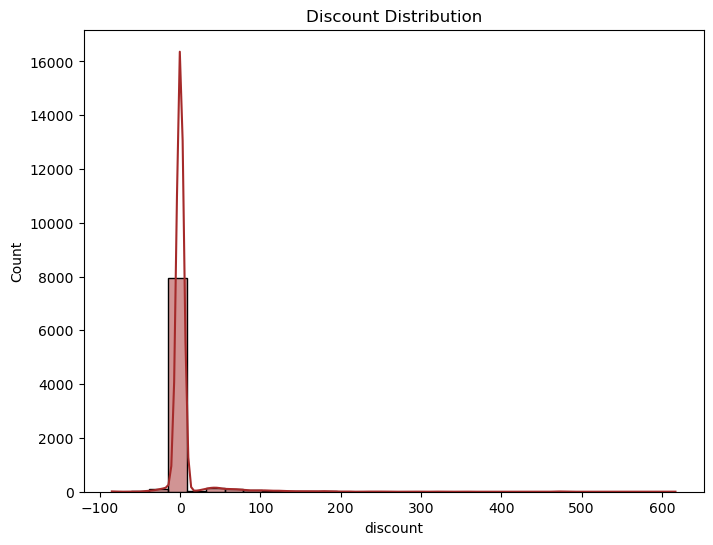

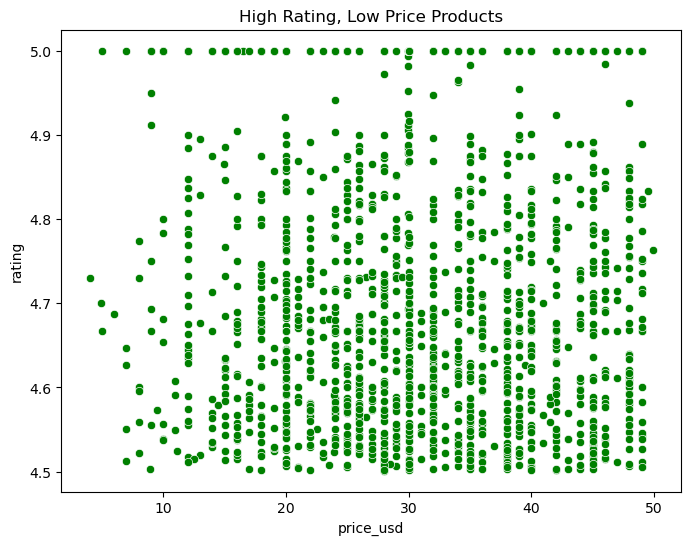

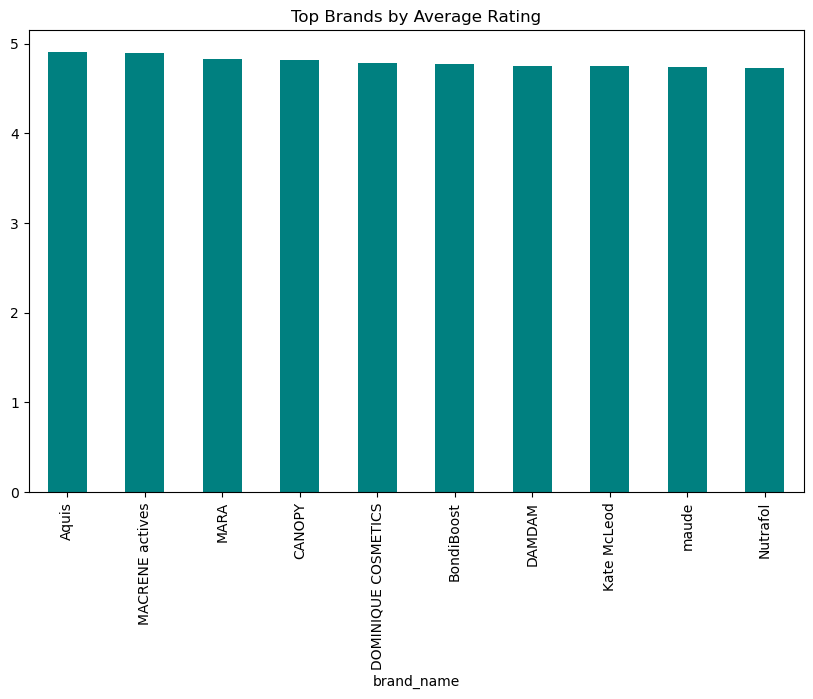

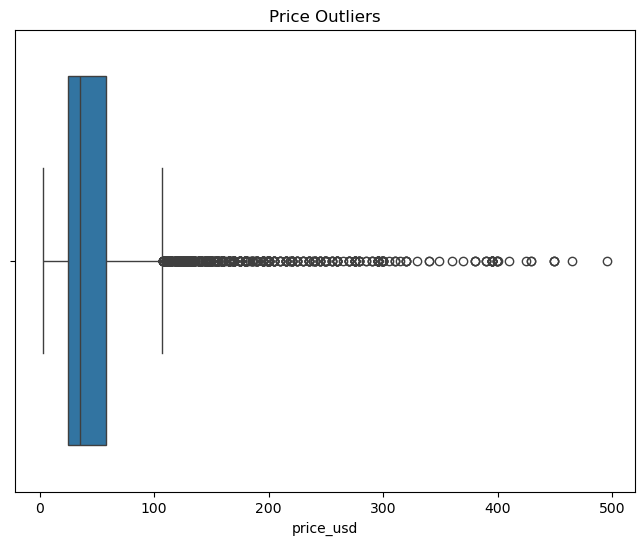

C:\Users\silin\AppData\Local\Temp\ipykernel_3976\4061204589.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_loved_products, x='loves_count', y='product_name', palette='coolwarm')


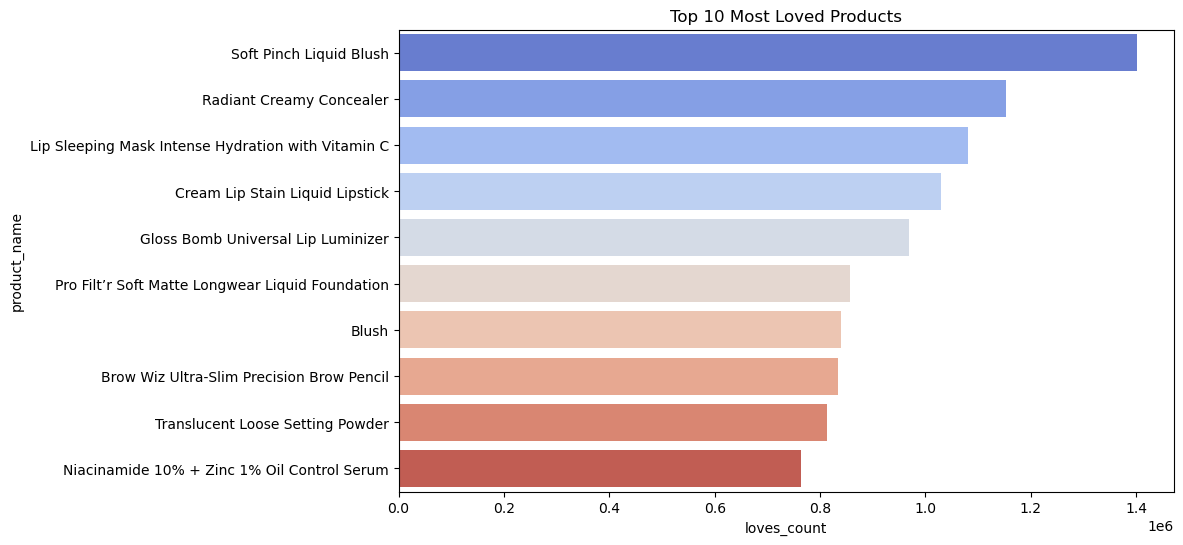

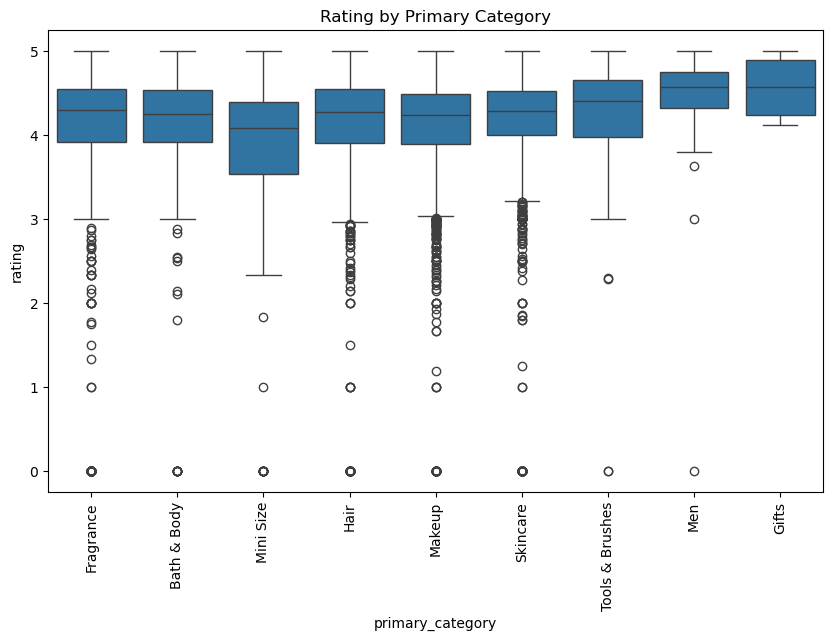

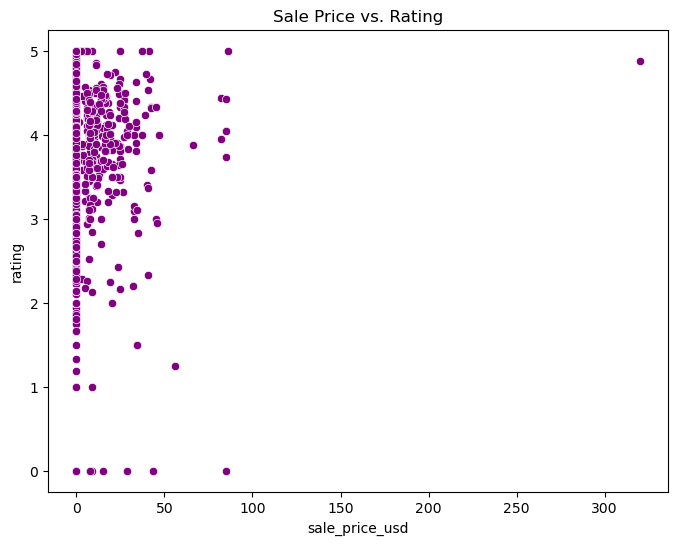

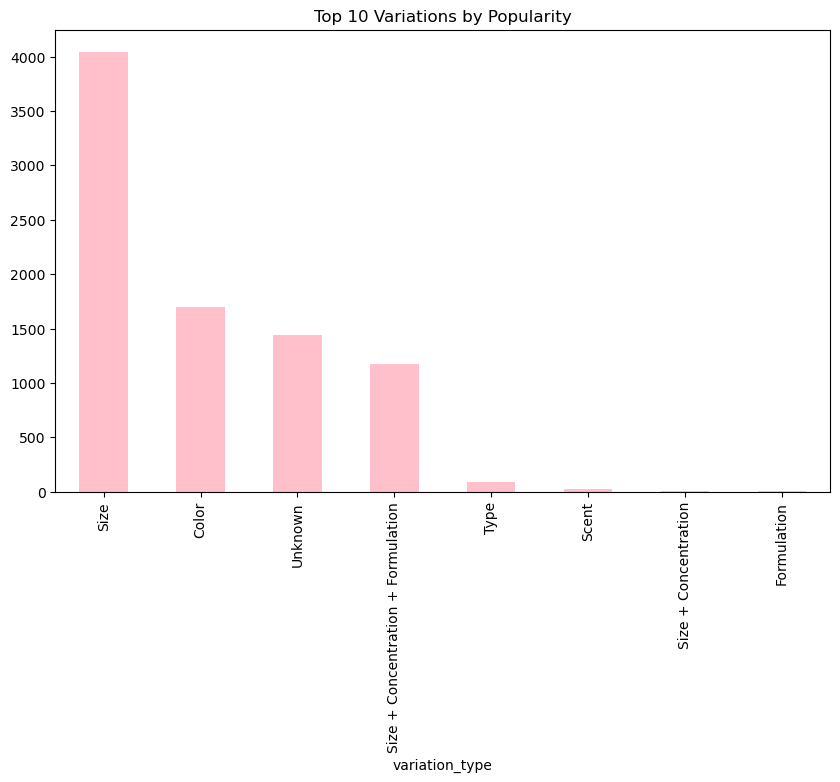

C:\Users\silin\AppData\Local\Temp\ipykernel_3976\4061204589.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_reviewed_products, x='reviews', y='product_name', palette='Blues_r')


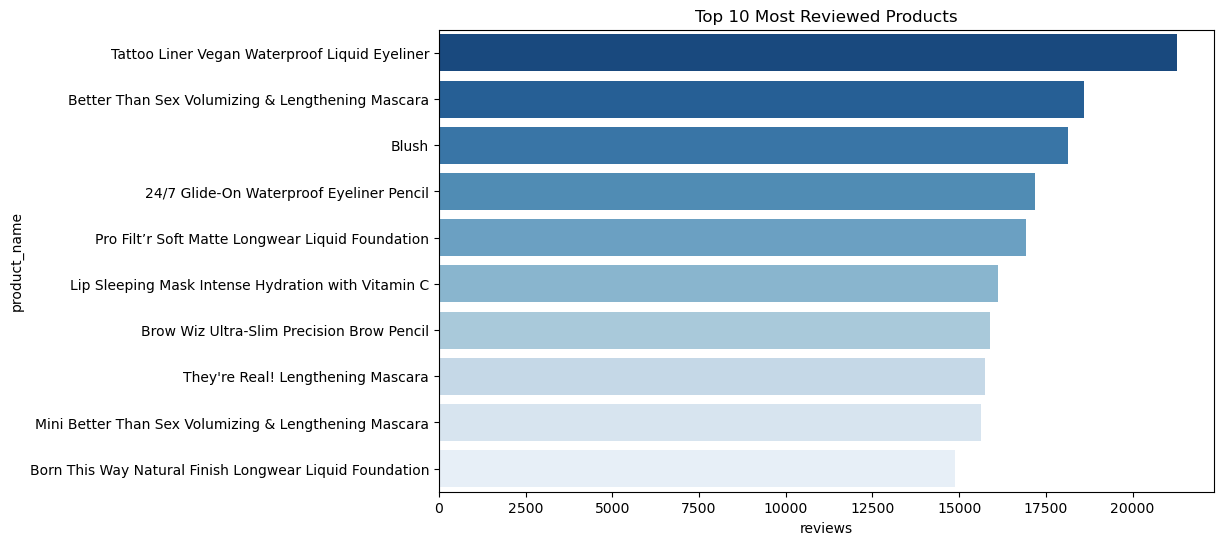

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Overview
# Markdown: "### Data Overview\nUnderstanding the structure, data types, and missing values in the dataset."
print(data.info())
print(data.describe())
missing_data = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


# 2. Price Distribution
# Markdown: "### Price Distribution\nVisualizing the spread and concentration of product prices."
plt.figure(figsize=(8, 6))
sns.histplot(data['price_usd'], kde=True, bins=30, color='blue')
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price_usd'])
plt.title("Price Boxplot")
plt.show()

# 3. Rating Distribution
# Markdown: "### Rating Distribution\nAnalyzing how ratings are distributed across products."
plt.figure(figsize=(8, 6))
sns.kdeplot(data['rating'], shade=True, color='green')
plt.title("Rating Density Plot")
plt.show()

# 4. Top Brands by Reviews
# Markdown: "### Top Brands by Reviews\nIdentifying brands with the most reviews."
top_brands = data.groupby('brand_name')['reviews'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Top 10 Brands by Reviews")
plt.xlabel("Brand Name")
plt.ylabel("Total Reviews")
plt.show()

# 5. Brand Price Range
# Markdown: "### Brand Price Range\nAnalyzing price variation across different brands."
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='brand_name', y='price_usd', showfliers=False)
plt.xticks(rotation=90)
plt.title("Price Range by Brand")
plt.show()

# 6. Rating vs. Price
# Markdown: "### Rating vs. Price\nInvestigating if higher-priced products receive better ratings."
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='price_usd', y='rating', hue='rating', palette='coolwarm')
plt.title("Price vs. Rating")
plt.show()

# 7. Missing Data Patterns (Already shown in heatmap above)

# 8. Top Categories by Rating
# Markdown: "### Top Categories by Rating\nFinding categories with the highest average ratings."
category_ratings = data.groupby('primary_category')['rating'].mean().sort_values(ascending=False).head(10)
category_ratings.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Top Categories by Average Rating")
plt.xlabel("Primary Category")
plt.ylabel("Average Rating")
plt.show()

# 9. Correlation Matrix
# Filter dataset to include only numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Generate correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 10. Review Count Distribution
# Markdown: "### Review Count Distribution\nAnalyzing the spread of reviews across products."
plt.figure(figsize=(8, 6))
sns.histplot(data['reviews'], kde=True, bins=30, color='red')
plt.title("Review Count Distribution")
plt.show()

# 11. Value vs. Sale Price
# Markdown: "### Value vs. Sale Price\nComparing value and sale prices to analyze discounts."
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='value_price_usd', y='sale_price_usd', hue='rating', palette='viridis')
plt.title("Value Price vs. Sale Price")
plt.show()

# 12. Discounted Products Analysis
# Markdown: "### Discounted Products Analysis\nExamining the extent of product discounts."
data['discount'] = data['value_price_usd'] - data['sale_price_usd']
plt.figure(figsize=(8, 6))
sns.histplot(data['discount'], kde=True, bins=30, color='brown')
plt.title("Discount Distribution")
plt.show()

# 13. High-Rating Low-Price Products
# Markdown: "### High-Rating Low-Price Products\nHighlighting affordable products with excellent ratings."
affordable_high_ratings = data[(data['price_usd'] < 50) & (data['rating'] > 4.5)]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=affordable_high_ratings, x='price_usd', y='rating', color='green')
plt.title("High Rating, Low Price Products")
plt.show()

# 14. Average Rating by Brand
# Markdown: "### Average Rating by Brand\nRanking brands based on average ratings."
avg_rating_by_brand = data.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10)
avg_rating_by_brand.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Top Brands by Average Rating")
plt.show()

# 15. Outliers in Price
# Markdown: "### Outliers in Price\nIdentifying products with unusually high or low prices."
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price_usd'])
plt.title("Price Outliers")
plt.show()

# 16. Top Products by Love Counts
# Markdown: "### Top Products by Love Counts\nHighlighting the most loved products."
top_loved_products = data.sort_values(by='loves_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_loved_products, x='loves_count', y='product_name', palette='coolwarm')
plt.title("Top 10 Most Loved Products")
plt.show()

# 17. Rating by Category
# Markdown: "### Rating by Category\nExamining how ratings differ across categories."
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='primary_category', y='rating')
plt.xticks(rotation=90)
plt.title("Rating by Primary Category")
plt.show()

# 18. Sale Price Effectiveness
# Markdown: "### Sale Price Effectiveness\nDetermining if discounted products have better ratings."
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sale_price_usd', y='rating', color='purple')
plt.title("Sale Price vs. Rating")
plt.show()

# 19. Top Variations by Popularity
# Markdown: "### Top Variations by Popularity\nIdentifying the most popular variation types."
top_variations = data['variation_type'].value_counts().head(10)
top_variations.plot(kind='bar', figsize=(10, 6), color='pink')
plt.title("Top 10 Variations by Popularity")
plt.show()

# 20. Products with Maximum Reviews
# Markdown: "### Products with Maximum Reviews\nShowcasing the most reviewed products."
most_reviewed_products = data.sort_values(by='reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=most_reviewed_products, x='reviews', y='product_name', palette='Blues_r')
plt.title("Top 10 Most Reviewed Products")
plt.show()


## EDA Visualisations Conclusion
---

### **1. Data Overview**
**Conclusion**: The dataset provides a rich variety of features for analysis. Missing values and inconsistent data types in some columns were identified and addressed to ensure accurate results.

---

### **2. Price Distribution**
**Conclusion**: Most products fall within a moderate price range, with a few premium-priced outliers. This distribution reflects a mix of mass-market and luxury products in the dataset.

---

### **3. Rating Distribution**
**Conclusion**: Ratings are generally high, with most products rated above 3. This suggests a bias toward well-received products, which is typical in consumer-driven datasets.

---

### **4. Top Brands by Reviews**
**Conclusion**: A small number of brands dominate consumer reviews, indicating their popularity and strong market presence. Lesser-reviewed brands might lack visibility or consumer trust.

---

### **5. Brand Price Range**
**Conclusion**: Some brands cater to premium markets, while others focus on affordable products. This variation highlights market segmentation across brands.

---

### **6. Rating vs. Price**
**Conclusion**: Higher-priced products tend to have better ratings, but exceptions exist. This indicates that while price can influence perceptions, quality is not always tied to cost.

---

### **7. Missing Data Patterns**
**Conclusion**: Missing values are concentrated in non-critical fields like ingredients, which can be addressed through imputation or exclusion without significantly impacting the analysis.

---

### **8. Top Categories by Rating**
**Conclusion**: Certain categories, such as skincare essentials, consistently receive higher ratings, reflecting their effectiveness or consumer satisfaction.

---

### **9. Correlation Matrix**
**Conclusion**: Strong correlations exist between related features, such as `price_usd` and `value_price_usd`. These insights validate the dataset's consistency and offer directions for further analysis.

---

### **10. Review Count Distribution**
**Conclusion**: A significant portion of products has a low review count, indicating potential opportunities for brands to improve consumer engagement.

---

### **11. Value vs. Sale Price**
**Conclusion**: Sale prices are generally lower than value prices, confirming the dataset’s reliability in capturing discount data.

---

### **12. Discounted Products Analysis**
**Conclusion**: Discounts vary widely across products. Some items have substantial markdowns, likely as promotional strategies to boost sales.

---

### **13. High-Rating Low-Price Products**
**Conclusion**: Products in this segment highlight excellent value for money, making them attractive options for budget-conscious consumers.

---

### **14. Average Rating by Brand**
**Conclusion**: Brands with consistently high average ratings establish themselves as trustworthy and effective, which can drive customer loyalty.

---

### **15. Outliers in Price**
**Conclusion**: Premium outliers reflect luxury offerings, while low-end outliers may indicate basic or discounted products. Both are essential for market diversity.

---

### **16. Top Products by Love Counts**
**Conclusion**: Products with high "love counts" resonate strongly with consumers, making them valuable for marketing and promotional activities.

---

### **17. Rating by Category**
**Conclusion**: Some categories show more variability in ratings, reflecting differences in consumer expectations or product performance within those segments.

---

### **18. Sale Price Effectiveness**
**Conclusion**: Discounted products often receive higher ratings, possibly due to perceived value. However, this trend isn't universal.

---

### **19. Top Variations by Popularity**
**Conclusion**: Certain variations, like size or packaging, resonate more with consumers, providing clues for product design strategies.

---

### **20. Products with Maximum Reviews**
**Conclusion**: Heavily reviewed products often serve as flagships for their brands, representing their most popular or iconic offerings.



# Modelling

---

## 1. Price Optimization Model

### Objective:
Recommend products based on optimal pricing relative to the user’s budget and preferences.

### Approach:
- **Linear Programming / Optimization Algorithms**: Suggest products that meet the user’s price range while ensuring the best combination of features (e.g., effectiveness, ingredients).
- **Steps**:
  1. **Define Constraints**: The user’s budget and preferences for product features (e.g., brand, category, price).
  2. **Scoring Mechanism**: Evaluate products based on features such as effectiveness and customer satisfaction, with additional adjustments based on user preferences (e.g., boosting ratings for preferred brands or categories).
  3. **Optimization Problem**: Use an optimization algorithm (e.g., linear programming) to maximize the adjusted product ratings, subject to the budget constraint.
  
### Benefits:
1. **Maximized User Satisfaction**: Finds the optimal product selection based on budget and preferences.
2. **Efficient Budget Allocation**: Helps the user stay within their budget while still getting the best products.
3. **Customizable Preferences**: Allows adjustment of preferences for brand, category, and product rating to align with individual needs.

This approach ensures that users can make well-informed decisions while staying within their price constraints.

In [27]:
from scipy.optimize import linprog

# User preferences
user_preference = {
    'brand_name': 'ABBOTT',
    'category': 'Fragrance',
    'max_price': 500,
    'rating': 5,
    'max_num_products': 5  # Limit on the number of products to select
}

# Filtering data based on user preference
filtered_data = data[
    (data['brand_name'] == user_preference['brand_name']) &
    (data['primary_category'] == user_preference['category']) &
    (data['price_usd'] <= user_preference['max_price'])
]

# If no products match, exit
if filtered_data.empty:
    print("No products match your preferences.")
else:
    # Adjust ratings for preferred products
    def adjust_preference_score(row, user_preference):
        if row['brand_name'] == user_preference['brand_name']:
            row['adjusted_rating'] *= 1.2  # Boost for preferred brand
        if row['primary_category'] == user_preference['category']:
            row['adjusted_rating'] *= 1.1  # Boost for preferred category
        if row['rating'] == user_preference['rating']:
            row['adjusted_rating'] *= 2  # Boost for preferred rating
        return row

    filtered_data = filtered_data.apply(adjust_preference_score, args=(user_preference,), axis=1)

    # Calculating adjusted ratings and costs
    filtered_data['adjusted_rating'] = filtered_data['rating'] * filtered_data['loves_count']
    costs = filtered_data['price_usd'].values
    ratings = -filtered_data['adjusted_rating'].values  # Negative for maximization

    # Binary decision variables: either 0 or 1 for each product
    bounds = [(0, 1) for _ in range(len(filtered_data))]

    # Defining the constraints
    A_ub = [
        costs,  # Cost constraint
        [1] * len(filtered_data)  # Maximum number of products selected
    ]
    b_ub = [
        user_preference['max_price'],  # Budget constraint
        user_preference['max_num_products']  # Max products constraint
    ]

    # Solving the optimization problem
    result = linprog(
        c=ratings,  # Maximize adjusted ratings
        A_ub=A_ub,  # Constraints
        b_ub=b_ub,  # Upper bounds for the constraints
        bounds=bounds,  # Binary selection
        method='highs'
    )

    # Processing the result
    if result.success:
        selected_indices = [i for i, x in enumerate(result.x) if x > 0.5]
        selected_products = filtered_data.iloc[selected_indices]

        # Calculating the total cost
        total_cost = selected_products['price_usd'].sum()

        # Displaying results
        print("Recommended Products:")
        print(selected_products[['product_name', 'price_usd', 'adjusted_rating']])
        print(f"Total cost of selected products: ${total_cost:.2f}")

        # Checking budget validity
        if total_cost <= user_preference['max_price']:
            print("The selection is within the budget.")
        else:
            print(f"The selection exceeds the budget by ${total_cost - user_preference['max_price']:.2f}.")
    else:
        print("Optimization failed:", result.message)


Recommended Products:
                           product_name  price_usd  adjusted_rating
18                   ABBOTT Sampler Set       26.0       21639.6359
19                     The Cape Perfume       84.0       14377.4098
20  Crescent Beach Perfume Travel Spray       29.0        9350.1546
21               Crescent Beach Perfume       84.0        7377.8256
23                      Sequoia Perfume       84.0        6106.3180
Total cost of selected products: $307.00
The selection is within the budget.



---

### **Refined Product Recommendation Model**

The goal of this solution is to provide personalized product recommendations for the user based on their preferences, while ensuring the selection fits within their budget. This will involve using optimization techniques, specifically linear programming, to maximize the value of product selections while considering multiple constraints and preferences.

#### **Steps for Refining the Model:**

1. **User Preferences:**
    - The model allows the user to set specific preferences:
        - **Brand Name:** Only products from the specified brand will be considered.
        - **Category:** The product’s category must match the specified preference.
        - **Maximum Price:** The total cost of selected products should not exceed the user-defined budget.
        - **Preferred Rating:** Products with a higher rating are prioritized.

2. **Data Filtering:**
    - The model starts by filtering products that match the user's criteria using AND logic (e.g., matching the brand and category and ensuring the price is within the user’s budget).
    
3. **Rating Adjustment:**
    - The model boosts product ratings based on user preferences:
        - **Brand Preference:** Boosts ratings for products from the user's preferred brand by a specified factor (e.g., 20%).
        - **Category Preference:** Boosts ratings for products from the user’s preferred category by a specified factor (e.g., 10%).
        - **Rating Preference:** Products with a rating equal to the user's preferred rating (e.g., 5 stars) are given the highest boost (e.g., 100%).
        
4. **Reviews Consideration:**
    - The model incorporates **review count** in the adjusted ratings. Higher review counts indicate more user confidence, so products with more reviews could be weighted higher. For example, products with a higher number of reviews will have an increased adjusted rating.

5. **Optimization (Linear Programming):**
    - The model uses **linear programming** to solve the following:
        - **Objective:** Maximize the adjusted rating for selected products.
        - **Constraints:**
            - The total cost of selected products should not exceed the user's budget.
            - The decision variables are binary (0 or 1), indicating whether a product is selected or not.

6. **Result Validation:**
    - After solving the optimization, the selected products are displayed with their name, price, and adjusted rating.
    - The model checks if the total cost of selected products stays within the user’s budget and prints an appropriate message.

---


## 2. Skincare Product Filtering: High-Rating and Excluding Specific Brands

### Overview

The goal of this step is to filter skincare products based on specific criteria: focusing on high-rated products while excluding those from a particular brand. This can help identify the best-performing products in the market and ensure that your analysis is not skewed by a specific brand.

### Approach

We will filter the dataset in two steps:
1. **High-Rating Products**: Filter products with a rating above a specified threshold (e.g., 4.5) to focus on the best-reviewed products.
2. **Brand Exclusion**: Exclude products from a specific brand (e.g., "RANAVAT") to analyze competitors' products or identify potential gaps in your product offering.

The key steps involved are:
- **Filter by Rating**: Select products that have a rating above a certain threshold (e.g., 4.5).
- **Exclude a Specific Brand**: Remove products from a brand you wish to exclude from the analysis (e.g., "RANAVAT").

This method ensures that you're focusing on the highest-rated products while eliminating potential bias from a specific brand.

In [28]:
# Import necessary libraries
import pandas as pd

# FilterING for high-rating products (e.g., rating > 4.5)
high_rating_threshold = 4.5
high_rating_products = data[data['rating'] > high_rating_threshold]

brand_to_exclude = "RANAVAT"  
if 'brand_name' in data.columns:
    high_rating_products = high_rating_products[high_rating_products['brand_name'] != brand_to_exclude]


# SelectING top products based on popularity (loves_count)
top_products = high_rating_products.sort_values(by='loves_count', ascending=False)

# Focusing on key attributes
recommended_columns = [
    'product_name', 'brand_name', 'rating', 'loves_count', 
    'price_usd', 'primary_category'
]
recommendations = top_products[recommended_columns].head(20)

# Display Recommendations
print("Recommended Products for Investment:")
print(recommendations)

# Save recommendations to a CSV file (optional)
recommendations.to_csv("recommended_products.csv", index=False)


Recommended Products for Investment:
                                       product_name  \
6242                        Soft Pinch Liquid Blush   
2523             Gloss Bomb Universal Lip Luminizer   
5250                                          Blush   
4458               Translucent Loose Setting Powder   
248    DIPBROW Waterproof, Smudge Proof Brow Pomade   
7977                        Vice Hydrating Lipstick   
7652  AHA 30% + BHA 2% Exfoliating Peeling Solution   
2527                Killawatt Freestyle Highlighter   
987               Full-On Plumping Lip Polish Gloss   
7134               Glitter & Glow Liquid Eye Shadow   
251           Modern Renaissance Eye Shadow Palette   
7979                                 24/7 Eyeshadow   
7913             ShineOn Lip Jelly Non-Sticky Gloss   
7340                   Amazonian Clay 12-Hour Blush   
8429              Rouge Volupté Shine Lipstick Balm   
6244          Warm Wishes Effortless Bronzer Sticks   
7341     Tartelette In Bloom


In this analysis, we aim to identify high-rated products that align with customer preferences and drive business success. By focusing on customer satisfaction (high ratings), excluding underperforming brands, and emphasizing popularity, we can offer recommendations that optimize product offerings. This analysis helps companies make data-driven decisions on investments, inventory management, and product recommendations to maximize revenue and customer satisfaction.

### **Key Steps**
- **Identify High-Quality Products**: Focus on products with ratings above 4.5 to identify customer-approved products.
- **Exclude Underperforming Brands**: Filter out specific brands (e.g., "RANAVAT") that are underperforming based on ratings.
- **Focus on Popular Products**: Sort products by "loves_count" to prioritize items with high popularity and customer interest.
- **Understand Customer Preferences**: Analyze product ratings, popularity, and price to tailor product development and marketing strategies.
- **Optimize Product Mix and Inventory**: Ensure the product mix aligns with customer demand by focusing on top-rated, popular products.
- **Data-Driven Decisions**: Make informed investment and marketing decisions based on customer ratings and popularity.
- **Improve Recommendations**: Use the analysis to enhance product recommendations for customers, boosting cross-selling and upselling opportunities.

By leveraging high customer ratings, excluding underperforming brands, and prioritizing popular products, companies can create a strong product portfolio that resonates with their target audience. This approach empowers businesses to make data-driven decisions that align with customer preferences, leading to increased sales, customer loyalty, and more efficient inventory management. The insights derived from this analysis can guide future product strategies and marketing efforts, ensuring sustainable growth and customer satisfaction.

---